# Homework 2

## Author: Marusic Diana (331)

## Problem statement

This notebook is based on analyzing fragments from books writtern by various authors.
 
 
The first problem to solve is to compare the writing style of various authors by predicting each text's author.
 
 
The second problem consists in analyzing text, extracting information and corelation between texts and grouping them in various clusters using unsupervised learning

### Import files 

In [359]:
# Some IPython magic
# Put these at the top of every notebook, here nbagg is used for interactive plots
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score

# # Check python version
# import sys
# print(sys.version)
# print(sys.version_info)

## Task 1: Text classification (by authors)

**Goals:**

- use SVM Classifier(SVC) to predict author of the given fragment

- choose the best hyperparameters: for *kernel*,  *C*, and  *gamma*
 
- apply PCA to reduce dimensionality and retrain

### Read data

In [360]:
FILE_NAME = "Marusic I Diana.csv"
dataset = pd.read_csv(FILE_NAME)

### Visualize data

In [361]:
dataset.head()
# print(dataset)

,Unnamed: 0,Sir Arthur Conan Doyle,Sir Walter Scott,Louisa May Alcott,Edmund Burke,Daniel Defoe,John Ruskin,Rudyard Kipling,Nathaniel Hawthorne,William Makepeace Thackeray,...,Edward Phillips Oppenheim,P G Wodehouse,Jack London,Jacob Abbott,Andrew Lang,Herbert George Wells,Thomas Carlyle,Joseph Conrad,Henry Rider Haggard,Frank Richard Stockton
0,0,efforts of old Gilray in the interests of law ...,"wood or stone, but only as emblems of the holy...","of penitence and thankfulness. ""Call them now...",formerly received from the Vizier. _But a copy...,"musket, I sat down myself to load all the rest...",a stone-mason's yard; and its rooms whitewashe...,once with a Bank of England director; wish I'd...,commander-in-chief of all the British forces i...,hard-heartedness in order to try those people ...,...,"say, I should have expected to have found her ...",Mr. Peters? Don't you think there is danger he...,warmer. Buck was wildly glad. He knew he was a...,"danger that they were often exposed to, that s...",think that the Achaeans were the Aryan conquer...,EXPERIMENTS; OF GRAND MONARCHY ...,"changes in our notions, informations, in our r...",Wretched old Allang went nearly mad with appre...,"stood by the open door, Martin, a helmet from ...","growing twilight of her happiness, and one was..."
1,1,of accepting the inevitable. A flat Arab loaf...,"was burned alive. Her name was Alison Pearson,...","and there was no time to ask leave, but it was...",for traders and manufacturers of every denomin...,"substantial Matter, which tho' it is full of S...","instance, the Gothic foliage, of which one ess...",way. _Time_: The edge of sunset. Single room i...,"feeling of an intruder, I walked towards Goat ...","out blaggerd names at you, and takes his pewny...",...,the blowing away of the window was merely a ru...,"cereal and a shirred egg? Now, for the love of...",might well hint to them that their bedtime had...,strange refusal could mean. Although James th...,watched the date tree till the cocks were crow...,went into my study and wrote down everything a...,"the Nightmares shall, to all time, be welcome ...",find for it a pedigree of distinguished ancest...,it must be supreme. For this ornament was noth...,"continued, often with great earnestness and he..."
2,2,Commons with an energy of hatred that one woul...,"the assertion, that a king might take a lesson...","locks powdered the dark ones. ""A heavenly wal...",honorable and advantageous to the India Compan...,"would not accept of it alone, but would have m...",God. To these alone we have to look; in these ...,"them. ""Fitz is right. I'm dead; only I don't s...","suppose, and in the winter and spring it will ...","those of Parson Thwackum, or Miss Seagrim. But...",...,"you, wouldn't it?"" Philip remarked. ""Five hun...",more about your unfortunate affair with that g...,"were iron. They were perceivers, willers, and...",Bothwell's intrigues.--Desperate schemes attri...,said to his son: 'Now that we own such a sple...,"of dark walls reflecting lamplight, and the my...","regular steps; then a friendly knocking: ""We a...","all black in the pale wall, stood open as he h...",gate of the kraal. But then her strength left ...,"but that simple-minded dependant and relative,..."
3,3,to breathe. There it was again! And again! Now...,I have this day learned more of Duke Charles t...,"let us help you if we can. Are you ill, in wan...","understand, to be sure, that I speak of Charle...","the slip both together, and never heard more o...","issue is not understood by the people, and the...","twisted into knots, riven with rents and diamo...",in a religious calm; recollections of many a h...,papa. I am Number 46 in the Exhibition of the ...,...,making that speech he had departed a great dea...,person who thanked goodness that he was not al...,"in it. But Carmack, the squaw-man! And Skooku...","revolve by the machinery. The axle, thus revol...",truth there may be in Saint-Germain's travels ...,Teddy! Poor old A

Dataset contains samples  of  text  from  20 different  authors and one useless column (Unnamed:0).  Each sample  has  50.000  characters  and  there  are  20  samples  for  each  author.

In [362]:
print(dataset.columns)

Index(['Unnamed: 0', 'Sir Arthur Conan Doyle', 'Sir Walter Scott',
       'Louisa May Alcott', 'Edmund Burke', 'Daniel Defoe', 'John Ruskin',
       'Rudyard Kipling', 'Nathaniel Hawthorne', 'William Makepeace Thackeray',
       'Lord Byron', 'Edward Phillips Oppenheim', 'P G Wodehouse',
       'Jack London', 'Jacob Abbott', 'Andrew Lang', 'Herbert George Wells',
       'Thomas Carlyle', 'Joseph Conrad', 'Henry Rider Haggard',
       'Frank Richard Stockton'],
      dtype='object')


### Drop unused column ('Unnamed: 0')

In [363]:
dataset = dataset.drop('Unnamed: 0', axis=1)

In [364]:
dataset.head()


,Sir Arthur Conan Doyle,Sir Walter Scott,Louisa May Alcott,Edmund Burke,Daniel Defoe,John Ruskin,Rudyard Kipling,Nathaniel Hawthorne,William Makepeace Thackeray,Lord Byron,Edward Phillips Oppenheim,P G Wodehouse,Jack London,Jacob Abbott,Andrew Lang,Herbert George Wells,Thomas Carlyle,Joseph Conrad,Henry Rider Haggard,Frank Richard Stockton
0,efforts of old Gilray in the interests of law ...,"wood or stone, but only as emblems of the holy...","of penitence and thankfulness. ""Call them now...",formerly received from the Vizier. _But a copy...,"musket, I sat down myself to load all the rest...",a stone-mason's yard; and its rooms whitewashe...,once with a Bank of England director; wish I'd...,commander-in-chief of all the British forces i...,hard-heartedness in order to try those people ...,metaphor.] [387] {335} The answer of the moth...,"say, I should have expected to have found her ...",Mr. Peters? Don't you think there is danger he...,warmer. Buck was wildly glad. He knew he was a...,"danger that they were often exposed to, that s...",think that the Achaeans were the Aryan conquer...,EXPERIMENTS; OF GRAND MONARCHY ...,"changes in our notions, informations, in our r...",Wretched old Allang went nearly mad with appre...,"stood by the open door, Martin, a helmet from ...","growing twilight of her happiness, and one was..."
1,of accepting the inevitable. A flat Arab loaf...,"was burned alive. Her name was Alison Pearson,...","and there was no time to ask leave, but it was...",for traders and manufacturers of every denomin...,"substantial Matter, which tho' it is full of S...","instance, the Gothic foliage, of which one ess...",way. _Time_: The edge of sunset. Single room i...,"feeling of an intruder, I walked towards Goat ...","out blaggerd names at you, and takes his pewny...","THE WORKS OF LORD BYRON. A NEW, REVI...",the blowing away of the window was merely a ru...,"cereal and a shirred egg? Now, for the love of...",might well hint to them that their bedtime had...,strange refusal could mean. Although James th...,watched the date tree till the cocks were crow...,went into my study and wrote down everything a...,"the Nightmares shall, to all time, be welcome ...",find for it a pedigree of distinguished ancest...,it must be supreme. For this ornament was noth...,"continued, often with great earnestness and he..."
2,Commons with an energy of hatred that one woul...,"the assertion, that a king might take a lesson...","locks powdered the dark ones. ""A heavenly wal...",honorable and advantageous to the India Compan...,"would not accept of it alone, but would have m...",God. To these alone we have to look; in these ...,"them. ""Fitz is right. I'm dead; only I don't s...","suppose, and in the winter and spring it will ...","those of Parson Thwackum, or Miss Seagrim. But...",scrubby paper to write on--excuse it. I am cer...,"you, wouldn't it?"" Philip remarked. ""Five hun...",more about your unfortunate affair with that g...,"were iron. They were perceivers, willers, and...",Bothwell's intrigues.--Desperate schemes attri...,said to his son: 'Now that we own such a sple...,"of dark walls reflecting lamplight, and the my...","regular steps; then a friendly knocking: ""We a...","all black in the pale wall, stood open as he h...",gate of the kraal. But then her strength left ...,"but that simple-minded dependant and relative,..."
3,to breathe. There it was again! And again! Now...,I have this day learned more of Duke Charles t...,"let us help you if we can. Are you ill, in wan...","understand, to be sure, that I speak of Charle...","the slip both together, and never heard more o...","issue is not understood by the people, and the...","twisted into knots, riven with rents and diamo...",in a religious calm; recollections of many a h...,papa. I am Number 46 in the Exhibition of the ...,marble where her feet ...,making that speech he had departed a great dea...,person who thanked goodness that he was not al...,"in it. But Carmack, the squaw-

### Remove useless characters

Remove parantheses and numbers from text

In [365]:
import re

regexes = [r"\[*{*\(*\)*}*\]*[0-9]*"]
regex = regexes[0]

for column in list(dataset):
    dataset[column] = dataset[column].str.replace("_", "")
    dataset[column] = dataset[column].str.replace(regex, "")
    
dataset.head()

,Sir Arthur Conan Doyle,Sir Walter Scott,Louisa May Alcott,Edmund Burke,Daniel Defoe,John Ruskin,Rudyard Kipling,Nathaniel Hawthorne,William Makepeace Thackeray,Lord Byron,Edward Phillips Oppenheim,P G Wodehouse,Jack London,Jacob Abbott,Andrew Lang,Herbert George Wells,Thomas Carlyle,Joseph Conrad,Henry Rider Haggard,Frank Richard Stockton
0,efforts of old Gilray in the interests of law ...,"wood or stone, but only as emblems of the holy...","of penitence and thankfulness. ""Call them now...",formerly received from the Vizier. But a copy ...,"musket, I sat down myself to load all the rest...",a stone-mason's yard; and its rooms whitewashe...,once with a Bank of England director; wish I'd...,commander-in-chief of all the British forces i...,hard-heartedness in order to try those people ...,metaphor. The answer of the mother of Brasi...,"say, I should have expected to have found her ...",Mr. Peters? Don't you think there is danger he...,warmer. Buck was wildly glad. He knew he was a...,"danger that they were often exposed to, that s...",think that the Achaeans were the Aryan conquer...,EXPERIMENTS; OF GRAND MONARCHY ...,"changes in our notions, informations, in our r...",Wretched old Allang went nearly mad with appre...,"stood by the open door, Martin, a helmet from ...","growing twilight of her happiness, and one was..."
1,of accepting the inevitable. A flat Arab loaf...,"was burned alive. Her name was Alison Pearson,...","and there was no time to ask leave, but it was...",for traders and manufacturers of every denomin...,"substantial Matter, which tho' it is full of S...","instance, the Gothic foliage, of which one ess...",way. Time: The edge of sunset. Single room in ...,"feeling of an intruder, I walked towards Goat ...","out blaggerd names at you, and takes his pewny...","THE WORKS OF LORD BYRON. A NEW, REVI...",the blowing away of the window was merely a ru...,"cereal and a shirred egg? Now, for the love of...",might well hint to them that their bedtime had...,strange refusal could mean. Although James th...,watched the date tree till the cocks were crow...,went into my study and wrote down everything a...,"the Nightmares shall, to all time, be welcome ...",find for it a pedigree of distinguished ancest...,it must be supreme. For this ornament was noth...,"continued, often with great earnestness and he..."
2,Commons with an energy of hatred that one woul...,"the assertion, that a king might take a lesson...","locks powdered the dark ones. ""A heavenly wal...",honorable and advantageous to the India Compan...,"would not accept of it alone, but would have m...",God. To these alone we have to look; in these ...,"them. ""Fitz is right. I'm dead; only I don't s...","suppose, and in the winter and spring it will ...","those of Parson Thwackum, or Miss Seagrim. But...",scrubby paper to write on--excuse it. I am cer...,"you, wouldn't it?"" Philip remarked. ""Five hun...",more about your unfortunate affair with that g...,"were iron. They were perceivers, willers, and...",Bothwell's intrigues.--Desperate schemes attri...,said to his son: 'Now that we own such a sple...,"of dark walls reflecting lamplight, and the my...","regular steps; then a friendly knocking: ""We a...","all black in the pale wall, stood open as he h...",gate of the kraal. But then her strength left ...,"but that simple-minded dependant and relative,..."
3,to breathe. There it was again! And again! Now...,I have this day learned more of Duke Charles t...,"let us help you if we can. Are you ill, in wan...","understand, to be sure, that I speak of Charle...","the slip both together, and never heard more o...","issue is not understood by the people, and the...","twisted into knots, riven with rents and diamo...",in a religious calm; recollections of many a h...,papa. I am Number in the Exhibition of the Ga...,marble where her feet ...,making that speech he had departed a great dea...,person who thanked goodness that he was not al...,"in it. But Carmack, the squaw-man

In [9]:
# data_flat = dataset.values.flatten()

In [367]:
# Same thing as flattend, but doesn't make a copy in memory if not required and is faster
data_flat = dataset.values.ravel()

#### Analyze length of flatten data and some texts

In [369]:
print(len(data_flat))
print(len(data_flat[2]))
print(data_flat[2][0:1000]+data_flat[2][0:1000])

400
499735
of penitence and thankfulness.  "Call them now, and let us get home," said Mrs. Jo; and Dan, getting upon the wall, sent a joyful word "Found!" ringing over the field.  How the wandering lights came dancing from all sides, and gathered round the little group among the sweet fern bushes! Such a hugging, and kissing, and talking, and crying, as went on must have amazed the glowworms, and evidently delighted the mosquitoes, for they hummed frantically, while the little moths came in flocks to the party, and the frogs croaked as if they could not express their satisfaction loudly enough.  Then they set out for home, a queer party, for Franz rode on to tell the news; Dan and Toby led the way; then came Nan in the strong arms of Silas, who considered her "the smartest little baggage he ever saw," and teased her all the way home about her pranks. Mrs. Bhaer would let no one carry Rob but himself, and the little fellow, refreshed by sleep, sat up, and chattered gayly, feeling himsel

In [21]:
# print(data_flat[1:2])

## Targets


Create list with all author names x 20 for the targets

In [370]:
# print(dataset.columns)
author_targets = list(dataset)
print(author_targets)

['Sir Arthur Conan Doyle', 'Sir Walter Scott', 'Louisa May Alcott', 'Edmund Burke', 'Daniel Defoe', 'John Ruskin', 'Rudyard Kipling', 'Nathaniel Hawthorne', 'William Makepeace Thackeray', 'Lord Byron', 'Edward Phillips Oppenheim', 'P G Wodehouse', 'Jack London', 'Jacob Abbott', 'Andrew Lang', 'Herbert George Wells', 'Thomas Carlyle', 'Joseph Conrad', 'Henry Rider Haggard', 'Frank Richard Stockton']


#### Transform authors to numeric data

In [371]:
le = preprocessing.LabelEncoder()
le.fit(author_targets)
print(author_targets)
numeric_targets = le.transform(author_targets)
print(numeric_targets)

# numeric_targets = np.repeat(numeric_targets,20)
numeric_targets = np.tile(numeric_targets,20)

print(numeric_targets)
print(len(numeric_targets))
    

['Sir Arthur Conan Doyle', 'Sir Walter Scott', 'Louisa May Alcott', 'Edmund Burke', 'Daniel Defoe', 'John Ruskin', 'Rudyard Kipling', 'Nathaniel Hawthorne', 'William Makepeace Thackeray', 'Lord Byron', 'Edward Phillips Oppenheim', 'P G Wodehouse', 'Jack London', 'Jacob Abbott', 'Andrew Lang', 'Herbert George Wells', 'Thomas Carlyle', 'Joseph Conrad', 'Henry Rider Haggard', 'Frank Richard Stockton']
[16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4]
[16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2
  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2  1  9 15 13
 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2  1  9 15 13 19 11  3 14
  7  8  0  6 18 10  5  4 16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6
 18 10  5  4 16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4
 16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2
  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2  1  9 15 13
 19 11  3 14  7  8  0  6 

### Using CountVectorizer

In [373]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data_flat)
print(X)

  (0, 146351)	1
  (0, 152055)	1
  (0, 147223)	1
  (0, 18412)	1
  (0, 40080)	1
  (0, 68735)	1
  (0, 143371)	1
  (0, 37714)	1
  (0, 35216)	1
  (0, 127267)	1
  (0, 122077)	1
  (0, 128704)	1
  (0, 151695)	1
  (0, 163787)	1
  (0, 77787)	1
  (0, 103252)	1
  (0, 56454)	1
  (0, 55228)	1
  (0, 27991)	1
  (0, 84528)	1
  (0, 158208)	1
  (0, 79628)	1
  (0, 125466)	1
  (0, 152060)	1
  (0, 68174)	1
  :	:
  (399, 136066)	44
  (399, 78000)	17
  (399, 126060)	30
  (399, 64074)	7
  (399, 33866)	14
  (399, 104801)	170
  (399, 62123)	11
  (399, 64676)	49
  (399, 164415)	600
  (399, 103611)	335
  (399, 43466)	4
  (399, 152602)	211
  (399, 21058)	313
  (399, 6672)	10
  (399, 161850)	1380
  (399, 79272)	5
  (399, 97669)	40
  (399, 104203)	15
  (399, 5068)	3181
  (399, 84381)	4
  (399, 146837)	5474
  (399, 74154)	1423
  (399, 103323)	37
  (399, 102996)	2528
  (399, 46706)	2


### Split data in train, test, validation

In [377]:
# Split data into train set and test set

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit()
X = data_flat
y = numeric_targets

for train_index, test_index in sss.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



### Using TfidfVectorizer

In [379]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b')

X_train = vectorizer.fit_transform(X_train)
vocabulary = vectorizer.get_feature_names()

print(vocabulary[:10])
print(vocabulary[-10:])


['aa', 'aaaaaah', 'aaah', 'aaarh', 'aab', 'aachen', 'aacomfortable', 'aage', 'aah', 'aahh']
['zylland', 'zym', 'zymotic', 'zytomar', 'zz', 'zzp', 'zzz', 'zzzing', 'zzzz', 'zzzzed']


In [380]:
X_test = vectorizer.transform(X_test)

### Set hyperparameters for  SVC (using gridsearch)

In [382]:
# Split data into train set and test set

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit()
X = data_flat
y = numeric_targets

for train_index, test_index in sss.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

hyperparams = {"gamma": [0.0, 0.1],
               "kernel": ["linear", "poly" ],
               "C": [float(0.5), float(0.75)] }

### Set scores

### Train

In [383]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


def trainSVM(X_train, y_train, X_test=None, y_test=None):
    cl = SVC()

    grid_search = GridSearchCV(cl, param_grid=hyperparams, cv=3, verbose=3, 
                               return_train_score=True)

    # start = time()
    print(grid_search.fit(X_train, y_train))
    
    return grid_search



In [384]:
grid_search = trainSVM(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.5, gamma=0.0, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=0.5, gamma=0.0, kernel=linear, score=0.875, total=  13.3s
[CV] C=0.5, gamma=0.0, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.7s remaining:    0.0s


[CV]  C=0.5, gamma=0.0, kernel=linear, score=0.8666666666666667, total=  13.1s
[CV] C=0.5, gamma=0.0, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   37.1s remaining:    0.0s


[CV]  C=0.5, gamma=0.0, kernel=linear, score=0.8333333333333334, total=  13.1s
[CV] C=0.5, gamma=0.0, kernel=poly ...................................
[CV] ........ C=0.5, gamma=0.0, kernel=poly, score=0.05, total=  13.3s
[CV] C=0.5, gamma=0.0, kernel=poly ...................................
[CV] ........ C=0.5, gamma=0.0, kernel=poly, score=0.05, total=  13.5s
[CV] C=0.5, gamma=0.0, kernel=poly ...................................
[CV] ........ C=0.5, gamma=0.0, kernel=poly, score=0.05, total=  13.2s
[CV] C=0.5, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.5, gamma=0.1, kernel=linear, score=0.875, total=  13.2s
[CV] C=0.5, gamma=0.1, kernel=linear .................................
[CV]  C=0.5, gamma=0.1, kernel=linear, score=0.8666666666666667, total=  13.1s
[CV] C=0.5, gamma=0.1, kernel=linear .................................
[CV]  C=0.5, gamma=0.1, kernel=linear, score=0.8333333333333334, total=  13.1s
[CV] C=0.5, gamma=0.1, kernel=poly ..................

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  7.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.0, 0.1], 'kernel': ['linear', 'poly'], 'C': [0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)


In [385]:
results = grid_search.cv_results_
print(results)

{'mean_fit_time': array([10.4461449 , 10.58852164, 10.39808019, 10.66203586, 10.36496067,
       10.5691452 , 10.37386847, 10.56781117]), 'std_fit_time': array([0.12514415, 0.11764412, 0.05147292, 0.15593853, 0.07043676,
       0.07417407, 0.07582043, 0.04187035]), 'mean_score_time': array([2.73123805, 2.74443849, 2.75804774, 2.74867662, 2.71977822,
       2.74850909, 2.71908847, 2.74854501]), 'std_score_time': array([0.0020907 , 0.01255405, 0.03135129, 0.00925698, 0.00378589,
       0.01230414, 0.00154085, 0.01284134]), 'param_C': masked_array(data=[0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'poly', 'linear', 'poly', 

In [386]:
print("Grid best score:")
print (grid_search.best_score_)


Grid best score:
0.9055555555555556


### Display results

In [388]:
from IPython.display import HTML, display


def dispResults(results):
    for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_score' % (sample)]
            sample_score_std = results['std_%s_score' % (sample)]

    params = results['params']
    # print(sample_score_mean)
    # print(sample_score_std)
    # print(params)

    for param in params:
        if param == grid_search.best_params_:
            print("***", param, '***')
        else:
            print(param)




    # Build table header
    tableHeader = '<tr>'    
    for item in ["Nr", "Parameters", "Score mean (MSE)", "Score std (Variance)"]:
        tableHeader += '<th>' + item  + '</th>'
    tableHeader += '</tr>'

    data_rows = ''

    for idx, param in enumerate(params):
        data_row = '<tr>'

        if param == grid_search.best_params_:
            data_row = '<tr style="font-weight:bold; color:red;">'

        data_row += '<td>' + str(idx+1) + '</td>'
        data_row += '<td>' + str(param) + '</td>'
        data_row += '<td>' + str(sample_score_mean[idx]) + '</td>'
        data_row += '<td>' + str(sample_score_std[idx]) + '</td>'


        data_row += '</tr>'

        data_rows += data_row

    HTML_code = '<table style="border: 1px solid black">'+tableHeader+ data_rows + '</table>' 

    display(HTML(HTML_code))

In [389]:
dispResults(results)

{'C': 0.5, 'gamma': 0.0, 'kernel': 'linear'}
{'C': 0.5, 'gamma': 0.0, 'kernel': 'poly'}
{'C': 0.5, 'gamma': 0.1, 'kernel': 'linear'}
{'C': 0.5, 'gamma': 0.1, 'kernel': 'poly'}
*** {'C': 0.75, 'gamma': 0.0, 'kernel': 'linear'} ***
{'C': 0.75, 'gamma': 0.0, 'kernel': 'poly'}
{'C': 0.75, 'gamma': 0.1, 'kernel': 'linear'}
{'C': 0.75, 'gamma': 0.1, 'kernel': 'poly'}


Nr,Parameters,Score mean (MSE),Score std (Variance)
1,"{'C': 0.5, 'gamma': 0.0, 'kernel': 'linear'}",0.8583333333333333,0.018002057495577376
2,"{'C': 0.5, 'gamma': 0.0, 'kernel': 'poly'}",0.05,0.0
3,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'linear'}",0.8583333333333333,0.018002057495577376
4,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'poly'}",0.6333333333333333,0.0340206908719886
5,"{'C': 0.75, 'gamma': 0.0, 'kernel': 'linear'}",0.9055555555555556,0.02832788618662657
6,"{'C': 0.75, 'gamma': 0.0, 'kernel': 'poly'}",0.05,0.0
7,"{'C': 0.75, 'gamma': 0.1, 'kernel': 'linear'}",0.9055555555555556,0.02832788618662657
8,"{'C': 0.75, 'gamma': 0.1, 'kernel': 'poly'}",0.6333333333333333,0.0340206908719886


## Using PCA

### Transform data to array

In [390]:
X_train = X_train.toarray()

In [391]:
X_test = X_test.toarray()

### Apply PCA 

In [396]:
from sklearn.decomposition import PCA
pca = PCA()
    
def applyPCA(X, n_components=None, test=False):
    global pca
    
    if test==True:
        X = pca.transform(X)    
    else:
        pca = PCA(n_components=n_components)
        X = pca.fit_transform(X)
    print(pca.singular_values_) 
    return X

In [397]:
X_train_PCA = applyPCA(X_train, n_components=2)

[3.35204433 2.8013351 ]


In [53]:
# print(X_train_PCA)

[[  1.07923218e+02  -7.57269770e+02]
 [  4.73051732e+02   1.43126585e+02]
 [  8.38800557e+01   1.61662084e+03]
 [  3.57965133e+02   5.11606343e+02]
 [  7.44042220e+02  -7.17957195e+02]
 [ -1.16883530e+03  -8.35395484e+02]
 [ -9.15538768e+02   2.04103638e+02]
 [  3.63573729e+02  -1.44165899e+02]
 [  4.27796666e+02   1.56434061e+03]
 [  1.41185056e+02   1.56230760e+03]
 [ -4.06800830e+02  -9.71866665e+01]
 [  3.92409248e+02   1.56192647e+03]
 [  2.18335153e+02  -1.18590756e+01]
 [  2.18134229e+02   4.75659595e+02]
 [  2.35300433e+02  -2.88334283e+02]
 [ -9.12383792e+02   5.17961918e+02]
 [  1.07861058e+03  -3.15087938e+02]
 [  5.38430704e+02   7.22160944e+02]
 [ -9.85468256e+02  -3.48412766e+02]
 [  1.21140273e+03  -9.11722420e+02]
 [  1.18363980e+03   1.94010180e+03]
 [  4.64841183e+03   5.15297712e+03]
 [  9.85817381e+02   1.79071854e+03]
 [ -2.35153425e+03   4.32208672e+02]
 [  2.29436414e+02  -3.40161308e+02]
 [ -1.81146786e+03  -1.11944656e+03]
 [  6.81009612e+01  -4.49964756e+02]
 

In [398]:
X_test_PCA = applyPCA(X_test, n_components=2,test=True)

[3.35204433 2.8013351 ]


#### Plot

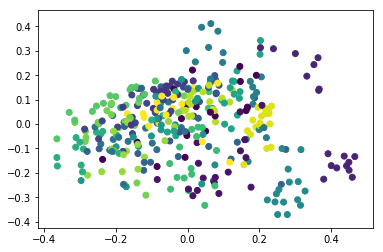

In [401]:
plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1], c=y_train)


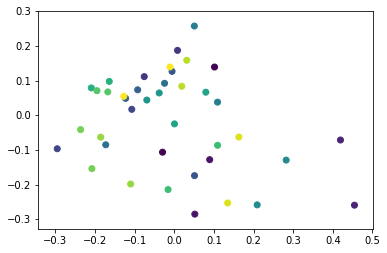

In [402]:
plt.scatter(X_test_PCA[:,0], X_test_PCA[:,1], c=y_test)


### Apply TSNE

In [403]:
from sklearn.manifold import TSNE

def applyTSNE(X):
    X = TSNE(n_components=2).fit_transform(X)
    return X

In [404]:
X_train_TSNE = applyTSNE(X_train)
X_test_TSNE = applyTSNE(X_test)

**Plot:**

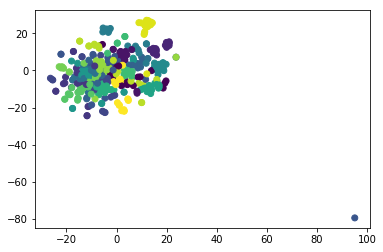

In [405]:
plt.scatter(X_train_TSNE[:,0], X_train_TSNE[:,1], c=y_train)

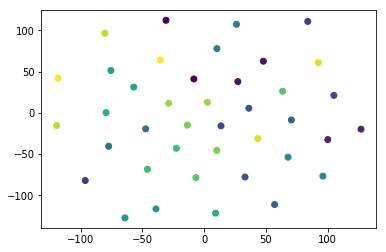

In [407]:
plt.scatter(X_test_TSNE[:,0], X_test_TSNE[:,1], c=y_test)

## Applying PCA in more dimensions to train

In [425]:
X_train_PCA = applyPCA(X_train)
X_test_PCA = applyPCA(X_test, test=True)
print(X_train_PCA)

[3.35204433e+00 2.80133519e+00 2.65220093e+00 2.36947013e+00
 2.21855891e+00 2.11369163e+00 1.96531365e+00 1.86783866e+00
 1.81108089e+00 1.71055642e+00 1.65824870e+00 1.62678070e+00
 1.61261464e+00 1.50556438e+00 1.46292249e+00 1.44870838e+00
 1.38816035e+00 1.36572762e+00 1.33892240e+00 1.31638591e+00
 1.29023019e+00 1.28098730e+00 1.26034004e+00 1.23958695e+00
 1.23177926e+00 1.22483820e+00 1.21970374e+00 1.20948612e+00
 1.20123863e+00 1.17670174e+00 1.17207662e+00 1.16553359e+00
 1.15508648e+00 1.15417497e+00 1.13822514e+00 1.13063658e+00
 1.12797859e+00 1.11779137e+00 1.11477475e+00 1.10996474e+00
 1.09755570e+00 1.09395475e+00 1.08292584e+00 1.08101679e+00
 1.07642317e+00 1.07450427e+00 1.07130969e+00 1.06518173e+00
 1.05617866e+00 1.05336516e+00 1.04773505e+00 1.04060084e+00
 1.03815282e+00 1.03660587e+00 1.03351219e+00 1.02527874e+00
 1.02337566e+00 1.02141864e+00 1.01904771e+00 1.01724992e+00
 1.01412914e+00 1.00833428e+00 1.00110181e+00 9.97289796e-01
 9.94105793e-01 9.905185

In [421]:
grid_search = trainSVM(X_train_PCA, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.5, gamma=0.0, kernel=linear .................................
[CV] ..... C=0.5, gamma=0.0, kernel=linear, score=0.875, total=   0.1s
[CV] C=0.5, gamma=0.0, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.5, gamma=0.0, kernel=linear, score=0.8666666666666667, total=   0.1s
[CV] C=0.5, gamma=0.0, kernel=linear .................................
[CV]  C=0.5, gamma=0.0, kernel=linear, score=0.8333333333333334, total=   0.1s
[CV] C=0.5, gamma=0.0, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ........ C=0.5, gamma=0.0, kernel=poly, score=0.05, total=   0.1s
[CV] C=0.5, gamma=0.0, kernel=poly ...................................
[CV] ........ C=0.5, gamma=0.0, kernel=poly, score=0.05, total=   0.1s
[CV] C=0.5, gamma=0.0, kernel=poly ...................................
[CV] ........ C=0.5, gamma=0.0, kernel=poly, score=0.05, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.5, gamma=0.1, kernel=linear, score=0.875, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=linear .................................
[CV]  C=0.5, gamma=0.1, kernel=linear, score=0.8666666666666667, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=linear .................................
[CV]  C=0.5, gamma=0.1, kernel=linear, score=0.8333333333333334, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=poly ...................................
[CV]  C=0.5, gamma=0.1, kernel=poly, score=0.21666666666666667, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=poly ...................

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    3.8s finished


In [422]:
results = grid_search.cv_results_
print(results)

{'mean_fit_time': array([0.08303587, 0.08468199, 0.08284879, 0.08435353, 0.08695006,
       0.0866197 , 0.08515938, 0.08566459]), 'std_fit_time': array([0.00091889, 0.00066509, 0.00253001, 0.00090289, 0.00271842,
       0.00102076, 0.00180667, 0.00061597]), 'mean_score_time': array([0.02311571, 0.02473108, 0.02220861, 0.02459772, 0.02509745,
       0.02755888, 0.02380347, 0.02599287]), 'std_score_time': array([0.00231009, 0.00270758, 0.0028054 , 0.00259265, 0.00025964,
       0.00065639, 0.00272284, 0.00044452]), 'param_C': masked_array(data=[0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'poly', 'linear', 'poly', 'linear'

In [423]:
dispResults(results)

{'C': 0.5, 'gamma': 0.0, 'kernel': 'linear'}
{'C': 0.5, 'gamma': 0.0, 'kernel': 'poly'}
{'C': 0.5, 'gamma': 0.1, 'kernel': 'linear'}
{'C': 0.5, 'gamma': 0.1, 'kernel': 'poly'}
*** {'C': 0.75, 'gamma': 0.0, 'kernel': 'linear'} ***
{'C': 0.75, 'gamma': 0.0, 'kernel': 'poly'}
{'C': 0.75, 'gamma': 0.1, 'kernel': 'linear'}
{'C': 0.75, 'gamma': 0.1, 'kernel': 'poly'}


Nr,Parameters,Score mean (MSE),Score std (Variance)
1,"{'C': 0.5, 'gamma': 0.0, 'kernel': 'linear'}",0.8583333333333333,0.018002057495577376
2,"{'C': 0.5, 'gamma': 0.0, 'kernel': 'poly'}",0.05,0.0
3,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'linear'}",0.8583333333333333,0.018002057495577376
4,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'poly'}",0.3055555555555556,0.06608542918539066
5,"{'C': 0.75, 'gamma': 0.0, 'kernel': 'linear'}",0.9055555555555556,0.02832788618662657
6,"{'C': 0.75, 'gamma': 0.0, 'kernel': 'poly'}",0.05,0.0
7,"{'C': 0.75, 'gamma': 0.1, 'kernel': 'linear'}",0.9055555555555556,0.02832788618662657
8,"{'C': 0.75, 'gamma': 0.1, 'kernel': 'poly'}",0.3055555555555556,0.06608542918539066


### Results on test set:

In [428]:
# print(grid_search)
y_pred = grid_search.predict(X_test_PCA)
print(y_pred)


[ 4  7 10  1  4 15 17 13  6 12 12  0  7  2  8 16  9  9  3 11 13  6  8 15
  6  6  2 16 19  0  3  5 17 19 10  1 11 14 14 18]


In [436]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_pred ))

0.95



### Final Conclusions - task 1

The results obtained for this task are:
- 95% accuracy on test set (with usign PCA)
- PCA in 2 dimensions, doesn't show good results
- much faster training using PCA with the default parameters (auto dimensions)
- best parameters for Support Vector Classifier:  {'C': 0.75, 'gamma': 0.0, 'kernel': 'linear'}


# Task 2: Text clustering

**The algorithms that will be used for this task:**
- DBCAN ( *eps*  and  *minsamples* hyperparams)
- KMeans ( *nclusters*  and  *init* hyperparams)
- Hierarchical(Agglomerative)  ( *nclusters* hyperparams)

**The metrics that will be used for this task:**
- *silhouette  score*
- *homogeneityscore*
- *completness  score*. 

## Data analysis

### Sentiment analysis

In [437]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import MWETokenizer
import string
  
texts = data_flat

sid = SentimentIntensityAnalyzer()

def analyzeText(text):
    ss = sid.polarity_scores(text)
    
    return ss["neg"], ss["pos"], ss["neu"], ss["compound"] 


negs = np.zeros(len(texts))
neus = np.zeros(len(texts))
poss = np.zeros(len(texts))
comps = np.zeros(len(texts))

for i, text in enumerate(texts):
    if i%20==0:
        print("Iteration ", i ,"/400")
    neg, pos, neu, comp=analyzeText(text[:10000] + "." + text[-1000:])
#     neg, pos, neu, comp=analyzeText(text)
    negs[i] = neg
    poss[i] = pos
    neus[i] = neu
    comps[i] = comp


[nltk_data] Downloading package punkt to /home/mdiannna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mdiannna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Iteration  0 /400
Iteration  20 /400
Iteration  40 /400
Iteration  60 /400
Iteration  80 /400
Iteration  100 /400
Iteration  120 /400
Iteration  140 /400
Iteration  160 /400
Iteration  180 /400
Iteration  200 /400
Iteration  220 /400
Iteration  240 /400
Iteration  260 /400
Iteration  280 /400
Iteration  300 /400
Iteration  320 /400
Iteration  340 /400
Iteration  360 /400
Iteration  380 /400


In [438]:
print(negs[0:10])
print(poss[0:10])
print(neus[0:10])
print(comps[0:10])

[0.083 0.095 0.124 0.083 0.101 0.054 0.125 0.084 0.11  0.084]
[0.109 0.136 0.151 0.086 0.083 0.121 0.08  0.11  0.155 0.076]
[0.808 0.769 0.725 0.83  0.817 0.825 0.795 0.806 0.735 0.839]
[ 0.9959  0.9986  0.9971  0.9207 -0.9943  0.9992 -0.9984  0.9956  0.999
 -0.9073]


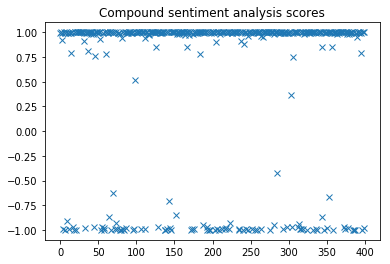

In [439]:
plt.plot(range(0,400), comps, 'x')
plt.title("Compound sentiment analysis scores")
plt.show()

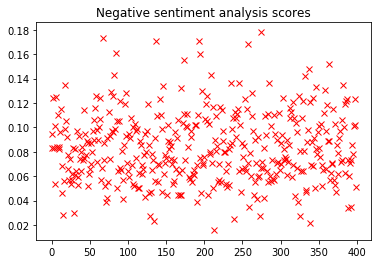

In [440]:
plt.plot(range(0,400), negs, 'xr')
plt.title("Negative sentiment analysis scores")
plt.show()

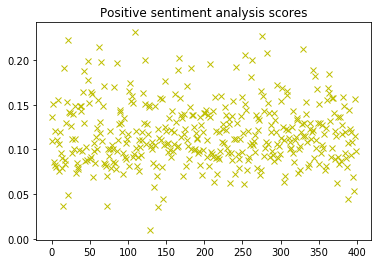

In [441]:
plt.plot(range(0,400), poss, 'xy')
plt.title("Positive sentiment analysis scores")
plt.show()

In [442]:
ar = np.array([negs, poss])
print(ar)
results = np.zeros(400)

for i in range(0, 400):
    results[i] = np.argmax(ar[:,i])
print(results)

[[0.083 0.095 0.124 0.083 0.101 0.054 0.125 0.084 0.11  0.084 0.082 0.096
  0.115 0.068 0.046 0.028 0.056 0.099 0.135 0.105 0.092 0.077 0.066 0.057
  0.074 0.054 0.057 0.062 0.083 0.03  0.061 0.082 0.064 0.097 0.053 0.059
  0.093 0.074 0.08  0.064 0.084 0.073 0.075 0.114 0.095 0.077 0.089 0.052
  0.087 0.062 0.066 0.07  0.087 0.08  0.097 0.106 0.09  0.116 0.126 0.072
  0.098 0.09  0.1   0.107 0.124 0.057 0.067 0.173 0.073 0.087 0.052 0.039
  0.091 0.042 0.055 0.113 0.093 0.074 0.129 0.097 0.126 0.096 0.143 0.099
  0.161 0.05  0.105 0.064 0.105 0.122 0.067 0.065 0.081 0.057 0.041 0.086
  0.119 0.128 0.093 0.071 0.064 0.059 0.095 0.091 0.108 0.069 0.1   0.054
  0.052 0.103 0.075 0.097 0.099 0.05  0.05  0.063 0.089 0.086 0.069 0.062
  0.066 0.077 0.043 0.095 0.08  0.097 0.119 0.046 0.086 0.027 0.047 0.078
  0.065 0.073 0.023 0.056 0.091 0.171 0.109 0.07  0.055 0.069 0.123 0.11
  0.099 0.047 0.134 0.062 0.071 0.077 0.075 0.045 0.102 0.089 0.082 0.088
  0.074 0.085 0.07  0.054 0.073 0.056 0

### Plot compound score and color each text in 2 colors based on positive/negative maximum

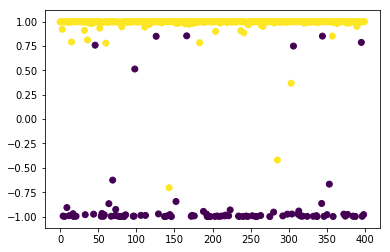

In [443]:
# plt.scatter(range(0,400), neus, c=np.maximum(poss, negs, neus))
# plt.scatter(range(0,400), neus, c=results)
# plt.scatter(range(0,400), results, c=results)
plt.scatter(range(0,400), comps, c=results)


#### Observations

It can be observed that the texts can be separated in 2 clusteres based on predominant positive/negative sentiment

#### Apply tfidf on full dataset

In [444]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b')

X = vectorizer.fit_transform(X)
vocabulary = vectorizer.get_feature_names()

print(vocabulary[:10])
print(vocabulary[-10:])


['aa', 'aaaaaah', 'aaah', 'aaarh', 'aab', 'aachen', 'aacomfortable', 'aage', 'aah', 'aahh']
['zylland', 'zym', 'zymotic', 'zytomar', 'zz', 'zzp', 'zzz', 'zzzing', 'zzzz', 'zzzzed']


### Applying PCA and changing parameters for DBSCAN

In [445]:
X_PCA = applyPCA(X.toarray())

[3.51220826e+00 2.93806249e+00 2.78613439e+00 2.40749381e+00
 2.29155357e+00 2.21494229e+00 2.06736800e+00 1.92434379e+00
 1.87888059e+00 1.79742766e+00 1.70942666e+00 1.69213454e+00
 1.67831677e+00 1.57318985e+00 1.50497023e+00 1.47870965e+00
 1.47394645e+00 1.44347734e+00 1.41405941e+00 1.40848634e+00
 1.35656206e+00 1.32980636e+00 1.31799338e+00 1.30446517e+00
 1.28399408e+00 1.27172802e+00 1.26318255e+00 1.23691824e+00
 1.22694975e+00 1.22016664e+00 1.21508234e+00 1.19909548e+00
 1.19102312e+00 1.18314467e+00 1.17038134e+00 1.16758086e+00
 1.16459654e+00 1.15670157e+00 1.14913264e+00 1.14723523e+00
 1.14346292e+00 1.14191499e+00 1.13304985e+00 1.12389203e+00
 1.11108121e+00 1.10442220e+00 1.09776160e+00 1.09464853e+00
 1.08865795e+00 1.08517626e+00 1.08142116e+00 1.07553526e+00
 1.07128365e+00 1.06741403e+00 1.06058665e+00 1.05883657e+00
 1.05820775e+00 1.04880188e+00 1.04359489e+00 1.04113403e+00
 1.03645834e+00 1.03361076e+00 1.02888369e+00 1.02613966e+00
 1.02275475e+00 1.019695

**Initialize clustering array**

In [446]:
clusterings = []

epsilon = np.arange(0.5, 1.4, 0.1)
min_sampless = [5,10,20,50]

for e in epsilon:
    for min_samples in min_sampless:
        cluster = {}
        dbscan = DBSCAN(eps=e, min_samples=min_samples)
        dbscan.fit(X_PCA)
        cluster["algorithm"] = "DBSCAN"
        cluster["labels"] = dbscan.labels_
        cluster["parameters"] = {'eps': e, 'min_samples':min_samples}
        clusterings.append(cluster)

        y_pred = dbscan.labels_

        unique, counts = np.unique(dbscan.labels_, return_counts=True)

        print("eps:",e,"min_samples:", min_samples,"clusters:", dict(zip(unique, counts)))

eps: 0.5 min_samples: 5 clusters: {-1: 400}
eps: 0.5 min_samples: 10 clusters: {-1: 400}
eps: 0.5 min_samples: 20 clusters: {-1: 400}
eps: 0.5 min_samples: 50 clusters: {-1: 400}
eps: 0.6 min_samples: 5 clusters: {-1: 400}
eps: 0.6 min_samples: 10 clusters: {-1: 400}
eps: 0.6 min_samples: 20 clusters: {-1: 400}
eps: 0.6 min_samples: 50 clusters: {-1: 400}
eps: 0.7 min_samples: 5 clusters: {-1: 384, 0: 5, 1: 5, 2: 6}
eps: 0.7 min_samples: 10 clusters: {-1: 400}
eps: 0.7 min_samples: 20 clusters: {-1: 400}
eps: 0.7 min_samples: 50 clusters: {-1: 400}
eps: 0.7999999999999999 min_samples: 5 clusters: {-1: 358, 0: 10, 1: 7, 2: 6, 3: 7, 4: 7, 5: 5}
eps: 0.7999999999999999 min_samples: 10 clusters: {-1: 400}
eps: 0.7999999999999999 min_samples: 20 clusters: {-1: 400}
eps: 0.7999999999999999 min_samples: 50 clusters: {-1: 400}
eps: 0.8999999999999999 min_samples: 5 clusters: {-1: 266, 0: 59, 1: 19, 2: 16, 3: 15, 4: 13, 5: 7, 6: 5}
eps: 0.8999999999999999 min_samples: 10 clusters: {-1: 333, 0: 

### Calculating scores

In [447]:
def calcScores(clustering):
    ss = silhouette_score(X_PCA, clustering["labels"])
    #print("Silhouette score:", ss)

    hs = homogeneity_score(y, clustering["labels"])
    #print("Homogenity score:", hs)

    cs = completeness_score(y, clustering["labels"])
    #print("Completeness score:", cs)
    
    return ss, hs, cs

In [448]:
silhouette_scores = []
homogeneity_scores = []
completeness_scores = []

for clustering in clusterings:
    print(set(clustering["labels"]))
    if(len(set(clustering["labels"]))<2):
        ss, hs, cs = 0,0,0
    else:
        ss, hs, cs = calcScores(clustering)
#     print("Silhouette score:", ss)
#     print("Homogenity score:", hs)
#     print("Completeness score:", cs)

    silhouette_scores.append(ss)
    homogeneity_scores.append(hs)
    completeness_scores.append(cs)

# print(silhouette_scores)
# print(homogeneity_scores)
# print(completeness_scores)

{-1}
{-1}
{-1}
{-1}
{-1}
{-1}
{-1}
{-1}
{0, 1, 2, -1}
{-1}
{-1}
{-1}
{0, 1, 2, 3, 4, 5, -1}
{-1}
{-1}
{-1}
{0, 1, 2, 3, 4, 5, 6, -1}
{0, 1, 2, 3, -1}
{-1}
{-1}
{0, 1, 2, -1}
{0, 1, -1}
{0, -1}
{0, -1}
{0, 1, -1}
{0, -1}
{0, -1}
{0, -1}
{0, -1}
{0, -1}
{0, -1}
{0, -1}
{0}
{0}
{0}
{0}


### Display results in table

In [449]:
from IPython.display import HTML, display

# Build table header
tableHeader = '<tr>'    
for item in ["Nr", "Algorithm","Parameters", "Silhouette score", "Homogenity score", "Completeness score"]:
    tableHeader += '<th>' + item  + '</th>'
tableHeader += '</tr>'


data_rows = ''
nr = 0
best_model_index = {}

for i, clustering in enumerate(clusterings):
        data_row = '<tr>'
         
        if silhouette_scores[i]==max(silhouette_scores):
            data_row = '<tr style="font-weight:bold; color:blue;">'
            best_model_index[clustering["algorithm"]] = i
        elif homogeneity_scores[i]==max(homogeneity_scores):
            data_row = '<tr style="font-weight:bold; color:green;">'
        elif completeness_scores[i]==max(completeness_scores):
            data_row = '<tr style="font-weight:bold; color:magenta;">'
            
        data_row += '<td>' + str(nr) + '</td>'
        data_row += '<td>' + str(clustering["algorithm"]) + '</td>'
        data_row += '<td>' + str(clustering["parameters"]) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(silhouette_scores[i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(homogeneity_scores[i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(completeness_scores[i]))) + '</td>'
        
        data_row += '</td>'
        data_rows += data_row
        nr += 1


legend = '<p>Legend:</p>'
legend += '<p><b  style="color:blue">best silhouette score</p>'
legend += '<p><b  style="color:green">best homogeneity score</b></p>'
legend += '<p><b  style="color:magenta"> best completeness score </b></p>'

HTML_code = '<table style="border: 1px solid black">'+tableHeader+ data_rows + '</table>'  + legend

display(HTML(HTML_code))

Nr,Algorithm,Parameters,Silhouette score,Homogenity score,Completeness score
0,DBSCAN,"{'eps': 0.5, 'min_samples': 5}",0.0,0.0,0.0
1,DBSCAN,"{'eps': 0.5, 'min_samples': 10}",0.0,0.0,0.0
2,DBSCAN,"{'eps': 0.5, 'min_samples': 20}",0.0,0.0,0.0
3,DBSCAN,"{'eps': 0.5, 'min_samples': 50}",0.0,0.0,0.0
4,DBSCAN,"{'eps': 0.6, 'min_samples': 5}",0.0,0.0,0.0
5,DBSCAN,"{'eps': 0.6, 'min_samples': 10}",0.0,0.0,0.0
6,DBSCAN,"{'eps': 0.6, 'min_samples': 20}",0.0,0.0,0.0
7,DBSCAN,"{'eps': 0.6, 'min_samples': 50}",0.0,0.0,0.0
8,DBSCAN,"{'eps': 0.7, 'min_samples': 5}",-0.03232,0.04171,0.59016
9,DBSCAN,"{'eps': 0.7, 'min_samples': 10}",0.0,0.0,0.0


### KMeans

In [492]:
clusterings = []

### Try to see if 2 clusters (based on positive/negative sentiment) can be obtained

In [493]:
inits = ["k-means++", "random"]
kmeans_2 = []
n_clusters=2

for init in inits:
    kmeans = KMeans(n_clusters=n_clusters, init=init)
    # kmeans.fit(X_train_PCA)
    kmeans.fit(X_PCA)
    unique, counts = np.unique(kmeans.labels_, return_counts=True)
    clusters = dict(zip(unique, counts))
    print("clusters:", clusters)
    cluster = {}
    cluster["algorithm"] = "KMeans"
    cluster["labels"] = kmeans.labels_
    cluster["parameters"] = {'inits': init, 'n_clusters':n_clusters}
    clusterings.append(cluster)

#     clusterings.append(kmeans)
    kmeans_2.append(kmeans)

clusters: {0: 119, 1: 281}
clusters: {0: 110, 1: 290}


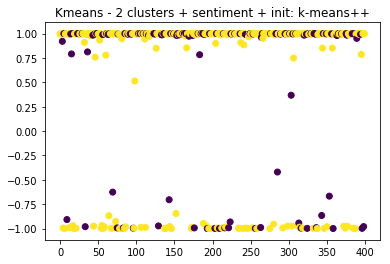

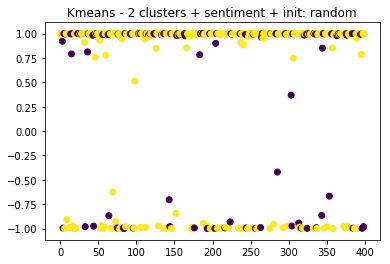

In [494]:
plt.scatter(range(0,400), comps, c=kmeans_2[0].labels_)
plt.title("Kmeans - 2 clusters + sentiment + init: k-means++")
plt.show()

plt.scatter(range(0,400), comps, c=kmeans_2[1].labels_)
plt.title("Kmeans - 2 clusters + sentiment + init: random")
plt.show()


**Conclusions:** clustering looks rather random than based on sentiment. Keans didn't separate data based on sentiment

### Try to see if 20 clusters (based on author) can be obtained

In [495]:
inits = ["k-means++", "random"]
kmeans_20 = []
n_clusters=20

for init in inits:
    kmeans = KMeans(n_clusters=n_clusters, init=init)
    # kmeans.fit(X_train_PCA)
    kmeans.fit(X_PCA)
    unique, counts = np.unique(kmeans.labels_, return_counts=True)
    clusters = dict(zip(unique, counts))
    print("clusters:", clusters)
    
    cluster = {}
    cluster["algorithm"] = "KMeans"
    cluster["labels"] = kmeans.labels_
    cluster["parameters"] = {'inits': init, 'n_clusters':n_clusters}
    clusterings.append(cluster)

#     clusterings.append(kmeans)
    kmeans_20.append(kmeans)

clusters: {0: 7, 1: 13, 2: 14, 3: 21, 4: 13, 5: 7, 6: 90, 7: 3, 8: 5, 9: 9, 10: 20, 11: 6, 12: 2, 13: 10, 14: 8, 15: 3, 16: 78, 17: 3, 18: 4, 19: 84}
clusters: {0: 3, 1: 9, 2: 13, 3: 8, 4: 12, 5: 1, 6: 145, 7: 1, 8: 112, 9: 8, 10: 2, 11: 5, 12: 10, 13: 20, 14: 2, 15: 5, 16: 19, 17: 2, 18: 22, 19: 1}


### Trying kmeans with different number of clusters

In [496]:
inits = ["k-means++", "random"]
n_clusterss = [3, 5, 10, 25, 40, 60, 100]
n_clusterss = np.arange(5, 150, 10)
kmeans_2 = []

for init in inits:
    for n_clusters in n_clusterss:
        kmeans = KMeans(n_clusters=n_clusters, init=init)
        # kmeans.fit(X_train_PCA)
        kmeans.fit(X_PCA)
        unique, counts = np.unique(kmeans.labels_, return_counts=True)
        clusters = dict(zip(unique, counts))
        print("clusters:", clusters)

        cluster = {}
        cluster["algorithm"] = "KMeans"
        cluster["labels"] = kmeans.labels_
        cluster["parameters"] = {'inits': init, 'n_clusters':n_clusters}
        clusterings.append(cluster)

    #     clusterings.append(kmeans)
        kmeans_2.append(kmeans)

clusters: {0: 65, 1: 266, 2: 36, 3: 14, 4: 19}
clusters: {0: 17, 1: 61, 2: 88, 3: 23, 4: 21, 5: 6, 6: 14, 7: 8, 8: 5, 9: 10, 10: 14, 11: 115, 12: 4, 13: 7, 14: 7}
clusters: {0: 1, 1: 28, 2: 6, 3: 10, 4: 14, 5: 37, 6: 7, 7: 14, 8: 21, 9: 65, 10: 16, 11: 20, 12: 8, 13: 2, 14: 16, 15: 14, 16: 4, 17: 12, 18: 81, 19: 5, 20: 2, 21: 6, 22: 2, 23: 5, 24: 4}
clusters: {0: 3, 1: 13, 2: 45, 3: 10, 4: 5, 5: 13, 6: 10, 7: 4, 8: 4, 9: 37, 10: 4, 11: 20, 12: 11, 13: 5, 14: 1, 15: 12, 16: 16, 17: 12, 18: 5, 19: 13, 20: 8, 21: 6, 22: 7, 23: 23, 24: 8, 25: 63, 26: 5, 27: 7, 28: 2, 29: 15, 30: 2, 31: 2, 32: 3, 33: 4, 34: 2}
clusters: {0: 2, 1: 13, 2: 14, 3: 4, 4: 5, 5: 25, 6: 32, 7: 3, 8: 2, 9: 5, 10: 12, 11: 55, 12: 2, 13: 3, 14: 2, 15: 9, 16: 6, 17: 8, 18: 2, 19: 42, 20: 2, 21: 11, 22: 3, 23: 2, 24: 9, 25: 2, 26: 4, 27: 5, 28: 15, 29: 1, 30: 5, 31: 12, 32: 12, 33: 4, 34: 5, 35: 2, 36: 3, 37: 2, 38: 2, 39: 10, 40: 13, 41: 2, 42: 17, 43: 2, 44: 9}
clusters: {0: 4, 1: 25, 2: 12, 3: 31, 4: 12, 5: 9, 6: 12,

clusters: {0: 48, 1: 41, 2: 4, 3: 2, 4: 2, 5: 5, 6: 1, 7: 20, 8: 7, 9: 14, 10: 17, 11: 155, 12: 2, 13: 54, 14: 28}
clusters: {0: 6, 1: 45, 2: 127, 3: 2, 4: 6, 5: 8, 6: 6, 7: 7, 8: 7, 9: 1, 10: 62, 11: 2, 12: 18, 13: 2, 14: 24, 15: 1, 16: 22, 17: 7, 18: 11, 19: 12, 20: 2, 21: 8, 22: 7, 23: 3, 24: 4}
clusters: {0: 8, 1: 13, 2: 1, 3: 22, 4: 17, 5: 2, 6: 44, 7: 4, 8: 48, 9: 10, 10: 4, 11: 1, 12: 12, 13: 2, 14: 81, 15: 1, 16: 10, 17: 1, 18: 1, 19: 1, 20: 1, 21: 6, 22: 1, 23: 6, 24: 11, 25: 2, 26: 3, 27: 16, 28: 2, 29: 7, 30: 48, 31: 2, 32: 9, 33: 1, 34: 2}
clusters: {0: 18, 1: 4, 2: 4, 3: 1, 4: 11, 5: 1, 6: 12, 7: 3, 8: 1, 9: 6, 10: 1, 11: 3, 12: 1, 13: 2, 14: 2, 15: 14, 16: 3, 17: 2, 18: 9, 19: 142, 20: 43, 21: 4, 22: 4, 23: 1, 24: 1, 25: 4, 26: 4, 27: 4, 28: 7, 29: 4, 30: 4, 31: 2, 32: 4, 33: 8, 34: 3, 35: 1, 36: 10, 37: 2, 38: 4, 39: 13, 40: 5, 41: 2, 42: 2, 43: 16, 44: 8}
clusters: {0: 1, 1: 1, 2: 7, 3: 7, 4: 6, 5: 8, 6: 18, 7: 1, 8: 6, 9: 18, 10: 2, 11: 5, 12: 10, 13: 4, 14: 10, 15: 3,

### Calculate scores

In [497]:
silhouette_scores = []
homogeneity_scores = []
completeness_scores = []

for clustering in clusterings:
    print(set(clustering["labels"]))
    if(len(set(clustering["labels"]))<2):
        ss, hs, cs = 0,0,0
    else:
        ss, hs, cs = calcScores(clustering)
#     print("Silhouette score:", ss)
#     print("Homogenity score:", hs)
#     print("Completeness score:", cs)

    silhouette_scores.append(ss)
    homogeneity_scores.append(hs)
    completeness_scores.append(cs)

# print(silhouette_scores)
# print(homogeneity_scores)
# print(completeness_scores)

{0, 1}
{0, 1}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144}


### Display scores

In [498]:
from IPython.display import HTML, display

# Build table header
tableHeader = '<tr>'    
for item in ["Nr", "Algorithm","Parameters", "Silhouette score", "Homogenity score", "Completeness score"]:
    tableHeader += '<th>' + item  + '</th>'
tableHeader += '</tr>'


data_rows = ''
nr = 0
best_model_index = {}

for i, clustering in enumerate(clusterings):
        data_row = '<tr>'
         
        if silhouette_scores[i]==max(silhouette_scores):
            data_row = '<tr style="font-weight:bold; color:blue;">'
            best_model_index[clustering["algorithm"]] = i
        elif homogeneity_scores[i]==max(homogeneity_scores):
            data_row = '<tr style="font-weight:bold; color:green;">'
        elif completeness_scores[i]==max(completeness_scores):
            data_row = '<tr style="font-weight:bold; color:magenta;">'
            
        data_row += '<td>' + str(nr) + '</td>'
        data_row += '<td>' + str(clustering["algorithm"]) + '</td>'
        data_row += '<td>' + str(clustering["parameters"]) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(silhouette_scores[i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(homogeneity_scores[i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(completeness_scores[i]))) + '</td>'
        
        data_row += '</td>'
        data_rows += data_row
        nr += 1


legend = '<p>Legend:</p>'
legend += '<p><b  style="color:blue">best silhouette score</p>'
legend += '<p><b  style="color:green">best homogeneity score</b></p>'
legend += '<p><b  style="color:magenta"> best completeness score </b></p>'

HTML_code = '<table style="border: 1px solid black">'+tableHeader+ data_rows + '</table>'  + legend

display(HTML(HTML_code))

Nr,Algorithm,Parameters,Silhouette score,Homogenity score,Completeness score
0,KMeans,"{'inits': 'k-means++', 'n_clusters': 2}",0.03403,0.12944,0.637
1,KMeans,"{'inits': 'random', 'n_clusters': 2}",0.02823,0.13192,0.6719
2,KMeans,"{'inits': 'k-means++', 'n_clusters': 20}",0.03824,0.52289,0.67388
3,KMeans,"{'inits': 'random', 'n_clusters': 20}",0.03511,0.46531,0.69712
4,KMeans,"{'inits': 'k-means++', 'n_clusters': 5}",0.0327,0.24593,0.70476
5,KMeans,"{'inits': 'k-means++', 'n_clusters': 15}",0.04225,0.50443,0.70548
6,KMeans,"{'inits': 'k-means++', 'n_clusters': 25}",0.06155,0.65482,0.72451
7,KMeans,"{'inits': 'k-means++', 'n_clusters': 35}",0.04884,0.67533,0.65063
8,KMeans,"{'inits': 'k-means++', 'n_clusters': 45}",0.05415,0.74411,0.67461
9,KMeans,"{'inits': 'k-means++', 'n_clusters': 55}",0.0755,0.71222,0.62044


**Conclusions:**
For KMeans algorithm, best homogeneity score (0.83) is obtained by using 100 clusters.

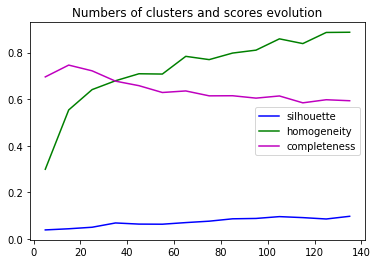

In [482]:
n_clusters = []
for i in range(4, 18):
    n_clusters.append(clusterings[i]["parameters"]["n_clusters"])

# print(silhouette_scores)
plt.plot(n_clusters, silhouette_scores[4:18], 'b', label="silhouette")
plt.plot(n_clusters, homogeneity_scores[4:18], 'g',label="homogeneity")
plt.plot(n_clusters, completeness_scores[4:18], 'm', label="completeness")
plt.title("Numbers of clusters and scores evolution")
plt.legend()



### Agglomerative

In [483]:
clusterings = []

In [484]:
# n_clusterss = [3, 5, 10, 25, 40, 60, 100]
n_clusterss = np.arange(10, 150, 10)

for n_clusters in n_clusterss:
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg.fit(X_PCA)
    s=silhouette_score(X,agg.labels_)
    print(s)

    cluster = {}
    cluster["algorithm"] = "Agglomerative"
    cluster["labels"] = agg.labels_
    cluster["parameters"] = {'n_clusters': n_clusters}
    clusterings.append(cluster)



0.03379850613254451
0.048143055152502966
0.06432521528228802
0.07500954504440671
0.08579497208608455
0.09271256248960257
0.09898108002756238
0.1050354434715067
0.10862930852999174
0.11263133403200498
0.11551810418736701
0.11737545328888671
0.12092209735977974
0.1211311056266662


#### Calculate scores

In [485]:
silhouette_scores = []
homogeneity_scores = []
completeness_scores = []

for clustering in clusterings:
    print(set(clustering["labels"]))
    if(len(set(clustering["labels"]))<2):
        ss, hs, cs = 0,0,0
    else:
        ss, hs, cs = calcScores(clustering)
#     print("Silhouette score:", ss)
#     print("Homogenity score:", hs)
#     print("Completeness score:", cs)

    silhouette_scores.append(ss)
    homogeneity_scores.append(hs)
    completeness_scores.append(cs)

# print(silhouette_scores)
# print(homogeneity_scores)
# print(completeness_scores)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,

### Display results

In [486]:
from IPython.display import HTML, display


# Build table header
tableHeader = '<tr>'    
for item in ["Nr", "Algorithm","Parameters", "Silhouette score", "Homogenity score", "Completeness score"]:
    tableHeader += '<th>' + item  + '</th>'
tableHeader += '</tr>'

data_rows = ''


data_rows = ''
nr = 0
best_model_index = {}

for i, clustering in enumerate(clusterings):
        data_row = '<tr>'
         
        if silhouette_scores[i]==max(silhouette_scores):
            data_row = '<tr style="font-weight:bold; color:blue;">'
            best_model_index[clustering["algorithm"]] = i
        elif homogeneity_scores[i]==max(homogeneity_scores):
            data_row = '<tr style="font-weight:bold; color:green;">'
        elif completeness_scores[i]==max(completeness_scores):
            data_row = '<tr style="font-weight:bold; color:magenta;">'
            
        data_row += '<td>' + str(nr) + '</td>'
        data_row += '<td>' + str(clustering["algorithm"]) + '</td>'
        data_row += '<td>' + str(clustering["parameters"]) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(silhouette_scores[i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(homogeneity_scores[i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(completeness_scores[i]))) + '</td>'
        
        data_row += '</td>'
        data_rows += data_row
        nr += 1


legend = '<p>Legend:</p>'
legend += '<p><b  style="color:blue">best silhouette score</p>'
legend += '<p><b  style="color:green">best homogeneity score</b></p>'
legend += '<p><b  style="color:magenta"> best completeness score </b></p>'

HTML_code = '<table style="border: 1px solid black">'+tableHeader+ data_rows + '</table>'  + legend

display(HTML(HTML_code))

Nr,Algorithm,Parameters,Silhouette score,Homogenity score,Completeness score
0,Agglomerative,{'n_clusters': 10},0.0338,0.4822,0.78853
1,Agglomerative,{'n_clusters': 20},0.04814,0.72415,0.78893
2,Agglomerative,{'n_clusters': 30},0.06433,0.83716,0.78906
3,Agglomerative,{'n_clusters': 40},0.07501,0.8512,0.74836
4,Agglomerative,{'n_clusters': 50},0.08579,0.86495,0.71841
5,Agglomerative,{'n_clusters': 60},0.09271,0.87421,0.69368
6,Agglomerative,{'n_clusters': 70},0.09898,0.90508,0.68177
7,Agglomerative,{'n_clusters': 80},0.10504,0.91259,0.66126
8,Agglomerative,{'n_clusters': 90},0.10863,0.92536,0.6503
9,Agglomerative,{'n_clusters': 100},0.11263,0.93545,0.64231


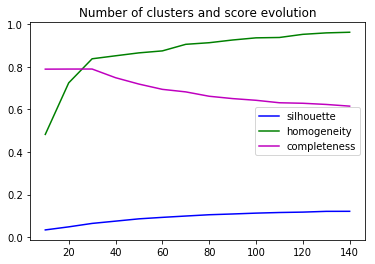

In [487]:
n_clusters = []
for i in range(0, len(clusterings)):
    n_clusters.append(clusterings[i]["parameters"]["n_clusters"])

# print(silhouette_scores)
plt.plot(n_clusters, silhouette_scores, 'b', label="silhouette")
plt.plot(n_clusters, homogeneity_scores, 'g',label="homogeneity")
plt.plot(n_clusters, completeness_scores, 'm', label="completeness")
plt.title('Number of clusters and score evolution')
plt.legend()


### Agglomerative with 2 classes - test with sentiment analysis

In [488]:
n_clusters = 2

agg = AgglomerativeClustering(n_clusters=n_clusters)
agg.fit(X_PCA)
s=silhouette_score(X,agg.labels_)
print(s)

cluster = {}
cluster["algorithm"] = "Agglomerative"
cluster["labels"] = agg.labels_
cluster["parameters"] = {'n_clusters': n_clusters}
# clusterings.append(cluster)



0.029508731815107127


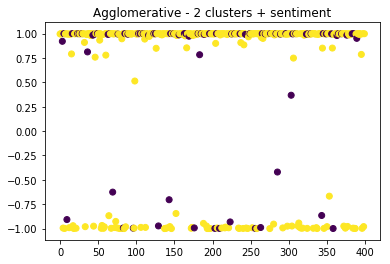

In [489]:
plt.scatter(range(0,400), comps, c=agg.labels_)
plt.title("Agglomerative - 2 clusters + sentiment")
plt.show()

## Final conclusions - task 2

**DBscan:**
- best silhouette score is 0.06183- obtained for params 'eps': 1.1999999999999997, 'min_samples': 5
- best homogeneity score is 0.25696 - obtained for params 'eps': 0.8999999999999999, 'min_samples': 5
- best completeness score is - 0.66125 - obtained for params 'eps': 0.7999999999999999, 'min_samples': 5	

**KMeans:**
- sentiment analysis - using 2 clusters - doesn't classify based on sentiment and data looks rather random
- trying classification by authors - n clusters=20 - completeness score is 0.70, 
(groups books written by same author with the accuracy of about 70% (0.72451)). Best classification is achieved for n_clusters=25, which is close to the real number of authors - 20
- best homogeneity score is 0.89275 - acieved for n_clusters=145 and grows with the number of clusters
- best hyperparameter for init - 'k-means++'
- best silhouette score - 0.09622 (n_clusters=135)

**Agglomerative:**
- best silhouette score is 0.12113 - by using 140 clusters (improves by having more clusters)
- best homogeneity score is 0.96176- by using140 clusters (improves by having more clusters)
- best completeness score is 0.7890 - 20-30 clusters (groups books written by same author with the accuracy of about 78%)
- sentiment analysis - using 2 clusters - doesn't classify based on sentiment

<hr>

***Note:*** 

*silhouette* - The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 
*completeness* -  A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
*homogeneity* - A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

(from sklearn documentation)